In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
df = pd.read_csv("gym_members_exercise_tracking.csv")

# Ver las primeras filas del dataset
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [21]:
# Estadísticas descriptivas para las variables numéricas
df.describe()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [22]:
# Ver las distribuciones de las variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Distribución de {column}:")
    print(df[column].value_counts())
    print("\n")


Distribución de Gender:
Gender
Male      511
Female    462
Name: count, dtype: int64


Distribución de Workout_Type:
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64




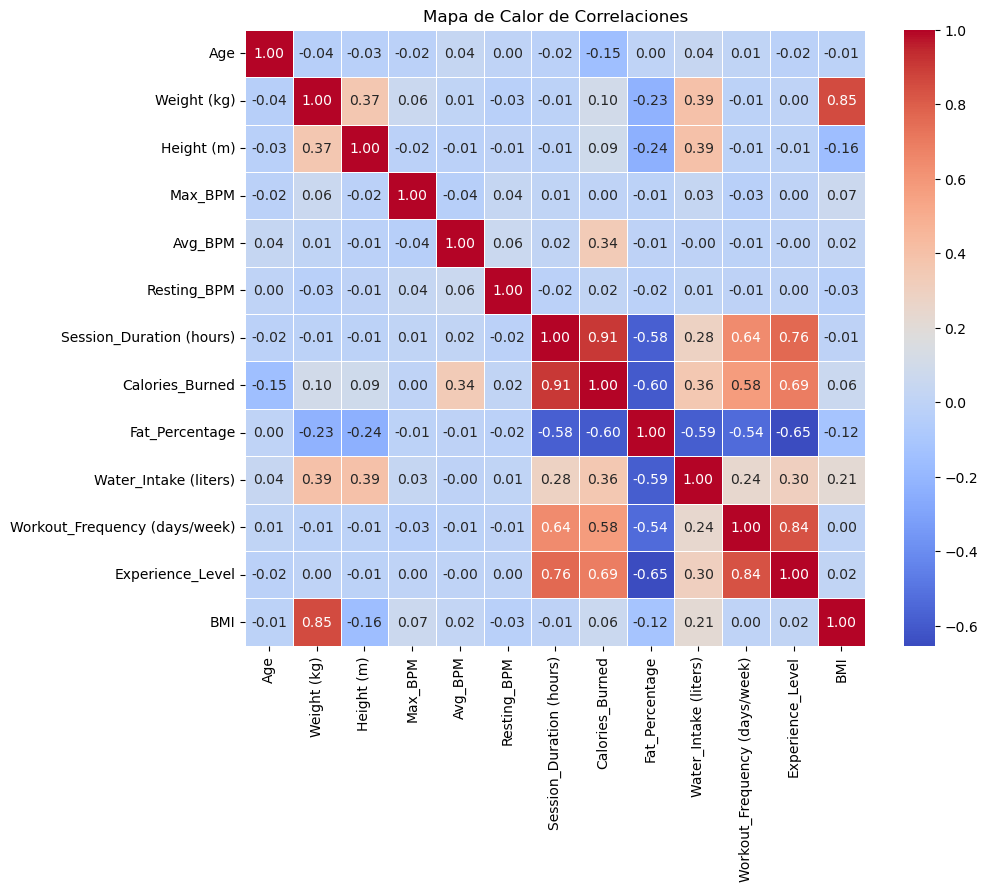

In [23]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la correlación solo entre las variables numéricas
correlation_matrix = df[numeric_columns].corr()

# Visualizar la correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()


In [24]:
# Comprobar valores nulos
df.isnull().sum()


Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

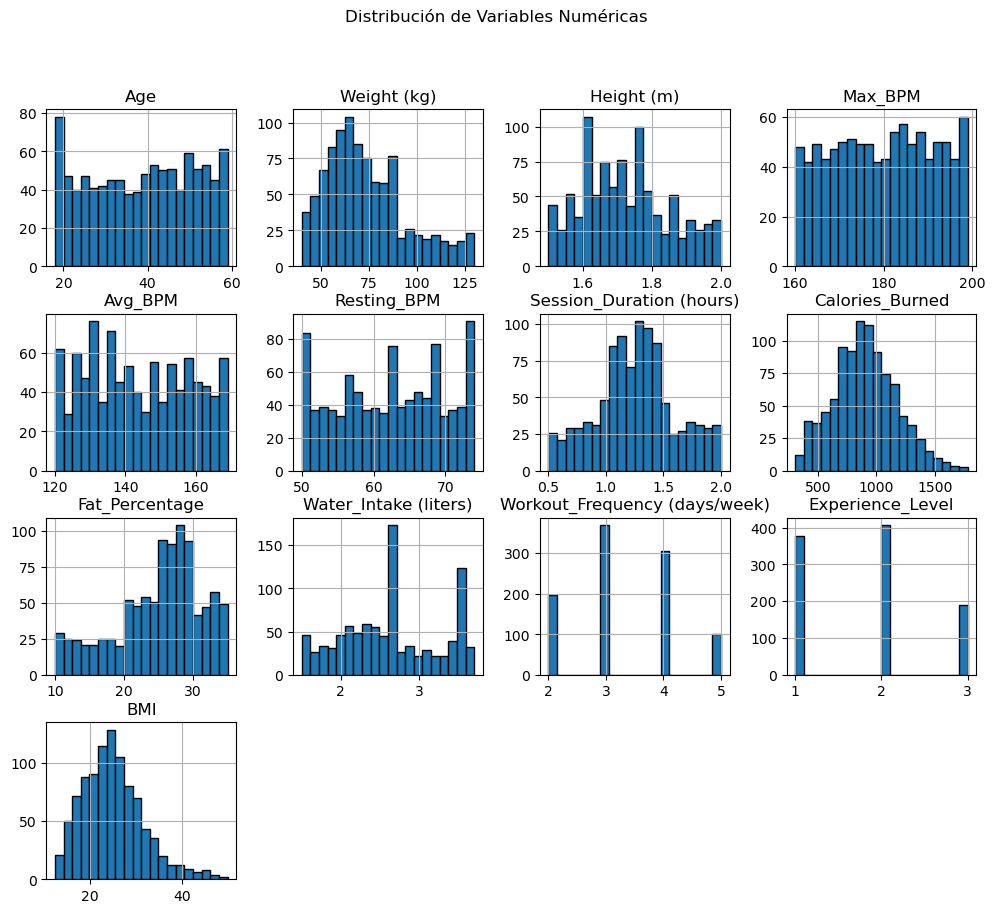

In [25]:
# Graficar histogramas para las variables numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas")
plt.show()


Parte 3

In [38]:
# Paso 1: Calcular las probabilidades de ocurrencia de cada categoría en columnas categóricas
categorical_columns = ['Gender', 'Workout_Type', 'Experience_Level']  # Las columnas categóricas

category_probs = {}
for col in categorical_columns:
    category_probs[col] = df[col].value_counts(normalize=True).to_dict()

# Verificar las probabilidades de cada categoría
category_probs

{'Gender': {'Male': 0.5251798561151079, 'Female': 0.4748201438848921},
 'Workout_Type': {'Strength': 0.26515930113052416,
  'Cardio': 0.2620760534429599,
  'Yoga': 0.24563206577595068,
  'HIIT': 0.22713257965056527},
 'Experience_Level': {2: 0.4172661870503597,
  1: 0.3864337101747174,
  3: 0.1963001027749229}}

In [39]:
# Paso 2: Generar valores numéricos basados en la distribución de los valores originales
numeric_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                   'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 
                   'Workout_Frequency (days/week)', 'BMI']  # Las columnas numéricas

# Crear un diccionario para almacenar las medias y desviaciones estándar
numeric_dist = {}
for col in numeric_columns:
    numeric_dist[col] = {
        'mean': df[col].mean(),
        'std': df[col].std()
    }

# Número de registros simulados
num_simulated = 100000

# Simular valores para las columnas numéricas
simulated_data = {}

for col in numeric_columns:
    mean = numeric_dist[col]['mean']
    std = numeric_dist[col]['std']
    simulated_data[col] = np.random.normal(loc=mean, scale=std, size=num_simulated)

# Ver algunos valores generados para verificar
simulated_data['Age'][:5]


array([31.80756834, 39.50440586, 15.99747506, 29.28194962, 12.48801892])

In [40]:
# Función para simular columnas categóricas con base en las probabilidades
def simulate_categorical_column(probabilities, size):
    categories = list(probabilities.keys())
    probabilities = list(probabilities.values())
    return np.random.choice(categories, size=size, p=probabilities)

# Simular las columnas categóricas en el dataset expandido
for col in categorical_columns:
    simulated_data[col] = simulate_categorical_column(category_probs[col], num_simulated)

# Ver los primeros registros de las columnas categóricas simuladas
pd.DataFrame(simulated_data)[categorical_columns].head()


,Gender,Workout_Type,Experience_Level
0,Male,HIIT,1
1,Male,HIIT,2
2,Male,Yoga,2
3,Male,Yoga,2
4,Male,Cardio,1


In [41]:
# Convertir simulated_data a DataFrame
simulated_data_df = pd.DataFrame(simulated_data)

# Función para identificar y eliminar valores atípicos usando el método de los cuartiles
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Eliminar los valores atípicos en las columnas numéricas de los datos simulados
for col in numeric_columns:
    simulated_data_df = remove_outliers(simulated_data_df, col)

# Verificar si hay valores atípicos
simulated_data_df.describe()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Experience_Level
count,91897.000000,91897.000000,91897.000000,91897.000000,91897.000000,91897.000000,91897.000000,91897.000000,91897.000000,91897.000000,91897.000000,91897.000000,91897.000000
mean,38.636845,73.808679,1.722611,179.851184,143.742748,62.219070,1.256683,905.257961,24.968450,2.625278,3.322969,24.915403,1.807839
std,11.788960,20.509536,0.124149,11.237502,13.949621,7.093585,0.333535,263.584628,6.105531,0.583384,0.886410,6.449335,0.739495
min,5.969462,17.030498,1.376740,148.733805,104.917069,42.382295,0.327437,175.578106,8.046266,1.008444,0.856714,7.048115,1.000000
25%,30.556847,59.711767,1.636789,172.117917,134.078165,57.305104,1.026339,724.804079,20.771841,2.224065,2.710947,20.470352,1.000000
50%,38.704634,73.722261,1.722754,179.870846,143.665634,62.190297,1.256821,906.134184,24.979530,2.626229,3.319578,24.907770,2.000000
75%,46.756493,87.845257,1.808485,187.577582,153.322911,67.138608,1.488269,1086.555155,29.170377,3.026602,3.933418,29.314870,2.000000
max,71.316704,130.550128,2.068467,210.971691,182.504693,82.058168,2.187057,1635.174403,41.903500,4.244308,5.786221,42.738924,3.000000


Paso 4

In [42]:
# Estadísticas descriptivas para el dataset original
original_stats = df.describe()

# Estadísticas descriptivas para el dataset expandido
expanded_stats = simulated_data_df.describe()

# Mostrar las estadísticas
original_stats, expanded_stats


(              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
 count  973.000000   973.000000   973.00000  973.000000  973.000000   
 mean    38.683453    73.854676     1.72258  179.883864  143.766701   
 std     12.180928    21.207500     0.12772   11.525686   14.345101   
 min     18.000000    40.000000     1.50000  160.000000  120.000000   
 25%     28.000000    58.100000     1.62000  170.000000  131.000000   
 50%     40.000000    70.000000     1.71000  180.000000  143.000000   
 75%     49.000000    86.000000     1.80000  190.000000  156.000000   
 max     59.000000   129.900000     2.00000  199.000000  169.000000   
 
        Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
 count   973.000000                973.000000       973.000000      973.000000   
 mean     62.223022                  1.256423       905.422405       24.976773   
 std       7.327060                  0.343033       272.641516        6.259419   
 min      50.000000            

In [43]:
import seaborn as sns

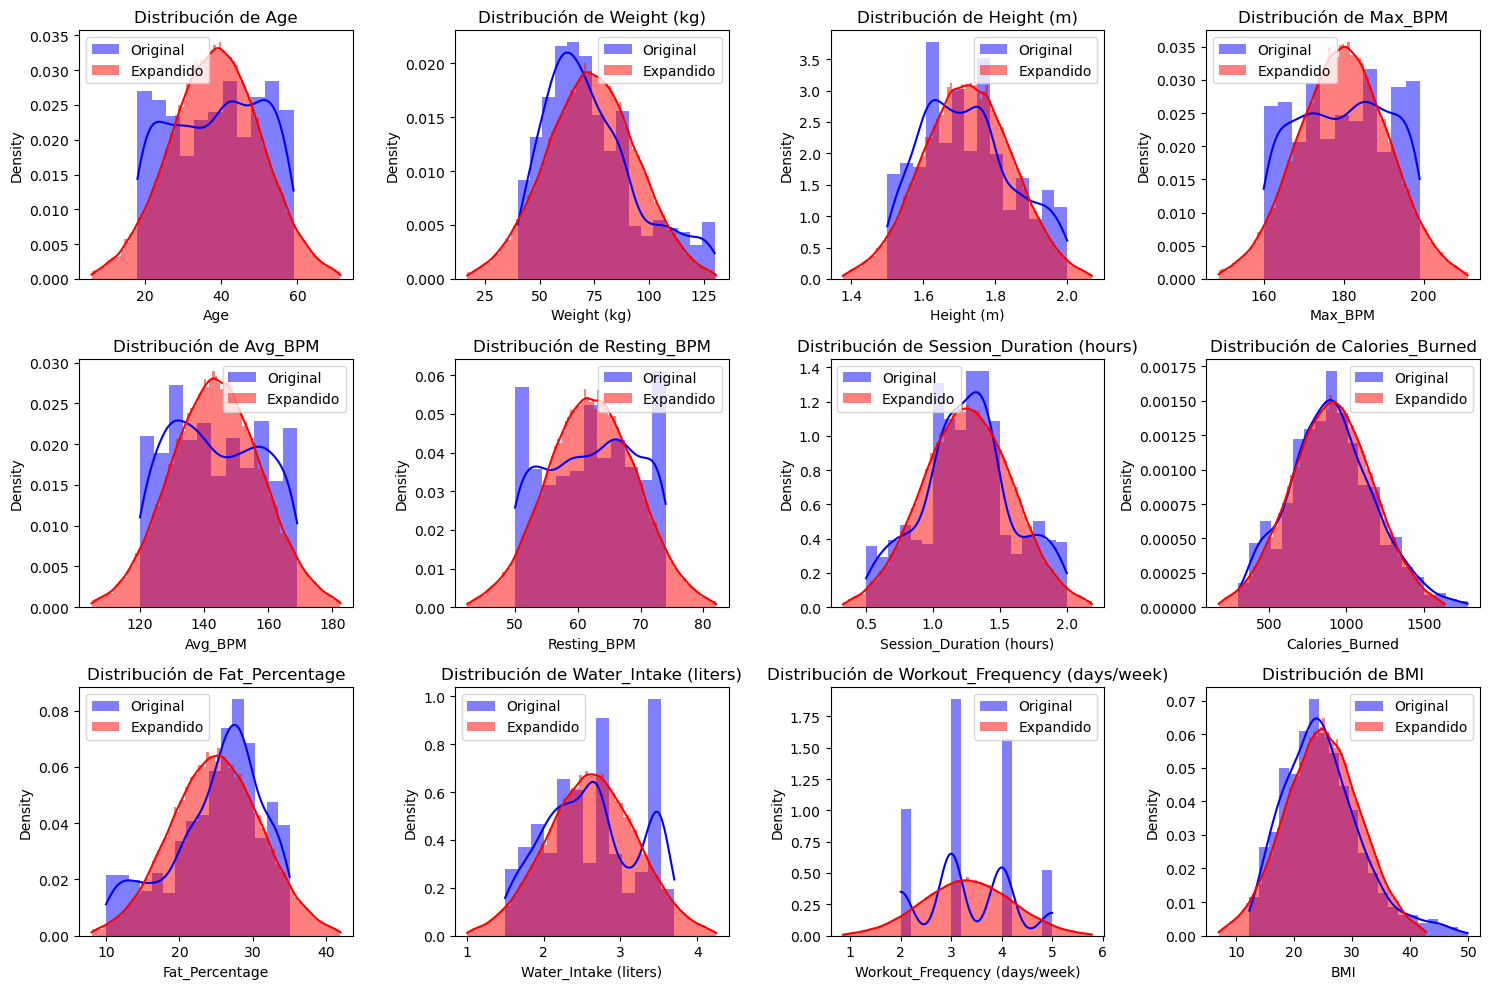

In [44]:
# Definir algunas columnas numéricas para comparar
numeric_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                   'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 
                   'Workout_Frequency (days/week)', 'BMI']

# Crear los gráficos
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True, color='blue', label='Original', stat="density", linewidth=0)
    sns.histplot(simulated_data_df[col], kde=True, color='red', label='Expandido', stat="density", linewidth=0)
    plt.title(f'Distribución de {col}')
    plt.legend()

plt.tight_layout()
plt.show()

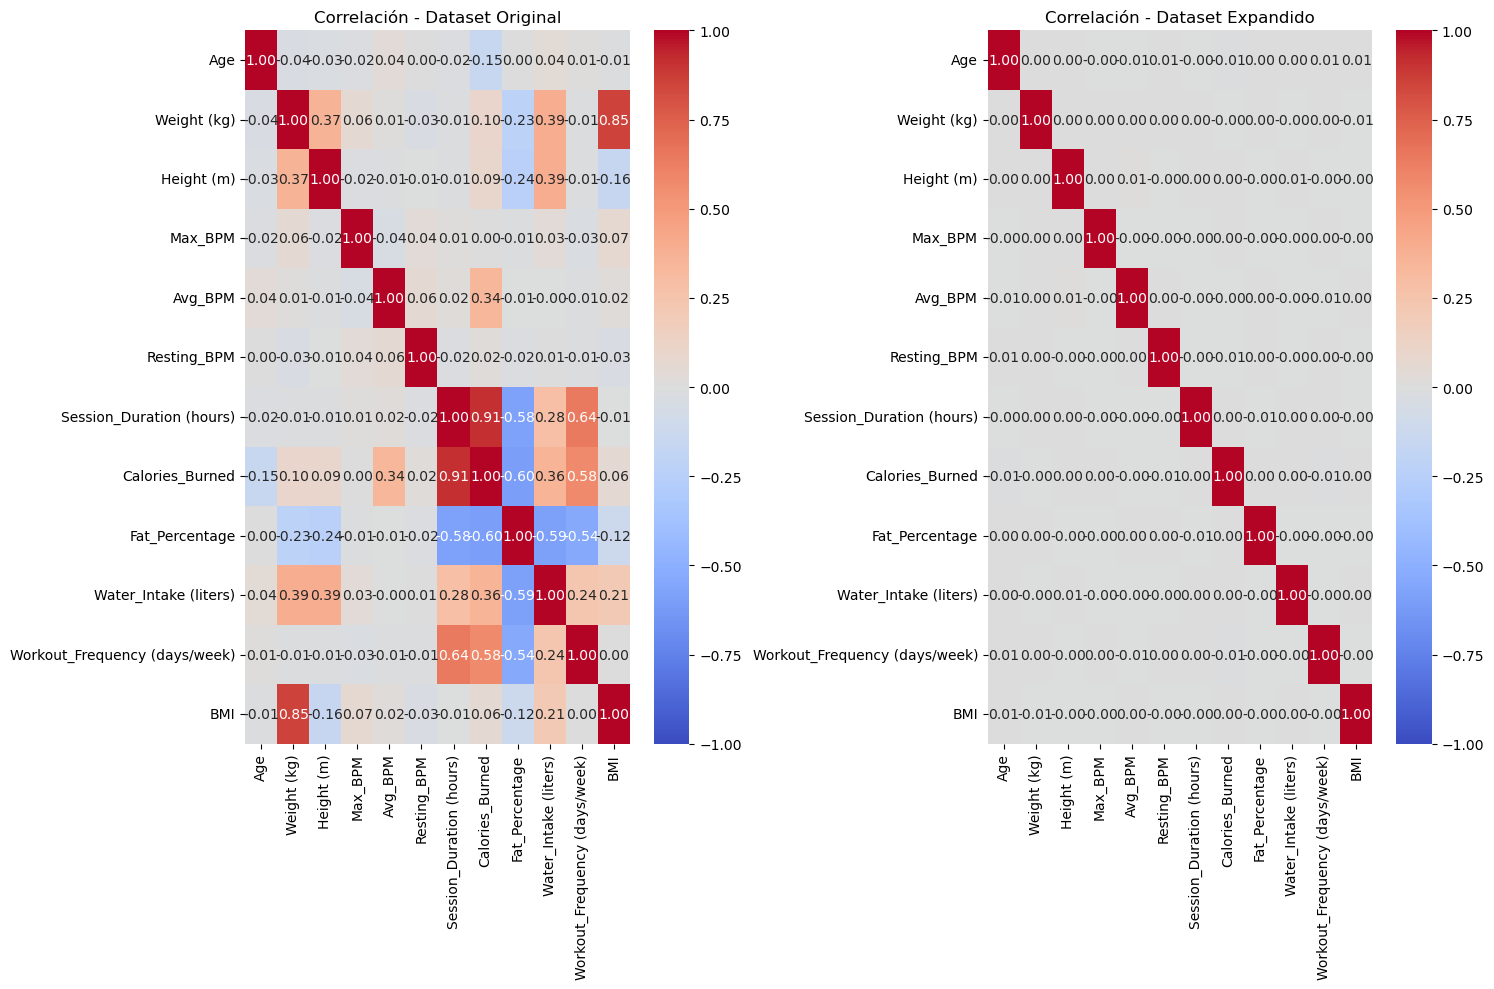

In [45]:
# Correlación del dataset original
original_corr = df[numeric_columns].corr()

# Correlación del dataset expandido
expanded_corr = simulated_data_df[numeric_columns].corr()

# Visualización de las matrices de correlación
plt.figure(figsize=(15, 10))

# Correlación del dataset original
plt.subplot(1, 2, 1)
sns.heatmap(original_corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlación - Dataset Original')

# Correlación del dataset expandido
plt.subplot(1, 2, 2)
sns.heatmap(expanded_corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlación - Dataset Expandido')

plt.tight_layout()
plt.show()
